# Modelling fluid inclusion stretching during simple isothermal ascent
- This notebook shows how to model the stretching of CO2 dominated fluid inclusions in olivine using python tool pfiFI (DeVitre and Wieser, 2023; EarthArXiv), implemented in DiadFit. Note that this tool is not designed to model FI with fluids other than CO2 at this time, or those in phases other than olivine. It is based on the model of Wanamaker and Evans, 1989.
- In this example (presented in the DiadFit paper), we model the stretching of a 1 micron radius pure CO2 fluid inclusion, 100 microns away from the crystal rim during ascent from 10km depth to the surface. We consider an ascent rate of 1 m/s (~0.03 MPa/s - equivalent to a Hawaiian style eruption) and a temperature of 1200 degrees celsius.

## First, make sure CoolProp is installed if using the Span and Wagner 1996 equation of state
- You only need to run this once. If you do not wish to use CoolProp, or face installation problems, please use 'SP94' instead of 'SW96'

In [1]:
%pip install CoolProp

Note: you may need to restart the kernel to use updated packages.


## Next import the necessary packages, including DiadFit

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import DiadFit as pf

## Now let's model stretching and evaluate how density, pressure and radius change

### First, set the initial conditions

In [3]:
T_K = 1200 + 273.15  # Temperature in Kelvin (Here 1200 degrees Celsius converted to Kelvin)

R_m = 1 * 10**-6  # radius of the FI in meters (here 1 micron)
b_m=100*10**-6 # distance to the crystal edge or crack (here 100 microns)
ascent_rate_ms=1 # ascent rate in m/s

depth_path_ini_fin_step=[10,0,20] #This defines the starting depth, ending depth and the number of steps in the path. More steps is better, especially for slow ascent rates.

crustal_model_config=pf.config_crustalmodel(crust_dens_kgm3=2750)# the configuration of your crustal model, here we set a single crustal density for the whole path; you can call help (pf.config_crustalmodel) for more options 

EOS='SW96' # Equation of state for CO2 (SW96 or SP94) if using SW96, ensure CoolProp is installed
plotfig=True # Whether to plot the figure or not
update_b=False # Whether to update b as the radius of the FI changes
report_results='fullpath' # Whether to report all the results, only the first and last step or only the last step

### Now run the model
- Note that the decrease in density for the conditions of our model is very small (< 1%), in fact much smaller than the uncertainty in any measurement that could be made. 

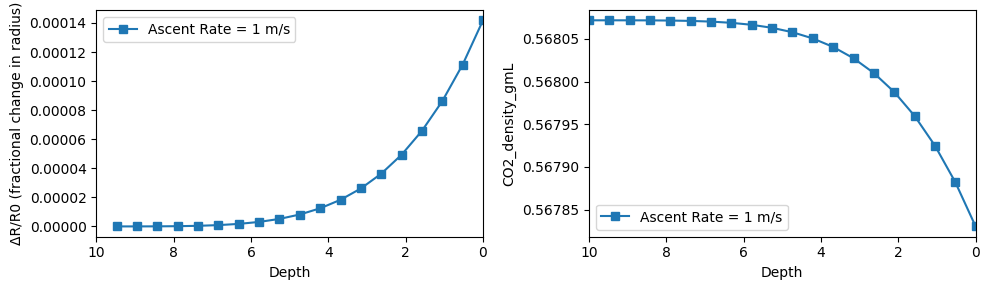

,Time(s),Step,dt(s),Pexternal(MPa),Pinternal(MPa),dR/dt(m/s),Fi_radius(μm),b (distance to xtal rim -μm),ΔR/R0 (fractional change in radius),CO2_dens_gcm3,Depth(km)
0,0.000000,0,0.000000,269.775000,269.775000,0.000000e+00,1.000000,100.0,NaN,0.568072,10.000000
1,526.315789,1,526.315789,255.576316,269.774999,1.446726e-18,1.000000,100.0,7.614349e-10,0.568072,9.473684
2,1052.631579,2,526.315789,241.377632,269.774986,1.754262e-17,1.000000,100.0,9.994390e-09,0.568072,8.947368
3,1578.947368,3,526.315789,227.178947,269.774931,7.551312e-17,1.000000,100.0,4.973814e-08,0.568072,8.421053
4,2105.263158,4,526.315789,212.980263,269.774777,2.127162e-16,1.000000,100.0,1.616940e-07,0.568072,7.894737
5,2631.578947,5,526.315789,198.781579,269.774432,4.749781e-16,1.000000,100.0,4.116825e-07,0.568071,7.368421
6,3157.894737,6,526.315789,184.582895,269.773767,9.156314e-16,1.000001,100.0,8.935937e-07,0.568070,6.842105
7,3684.210526,7,526.315789,170.384211,269.772608,1.594852e-15,1.000002,100.0,1.732989e-06,0.568069,6.315789
8,4210.526316,8,526.315789,156.185526,269.770735,2.579160e-15,1.000003,100.0,3.090442e-06,0.568067,5.789474
9,4736.842105,9,526.315789,141.986842,269.767873,3.941020e-15,1.000005,100.0,5.164663e-06,0.568063,5.263158


In [4]:
results = pf.stretch_in_ascent(R_m=R_m, b_m=b_m,T_K=T_K,ascent_rate_ms=ascent_rate_ms,crustal_model_config=crustal_model_config,
                                                 depth_path_ini_fin_step=depth_path_ini_fin_step,EOS=EOS,plotfig=plotfig,update_b=update_b,report_results=report_results)

results

### We can then replot and save the figure

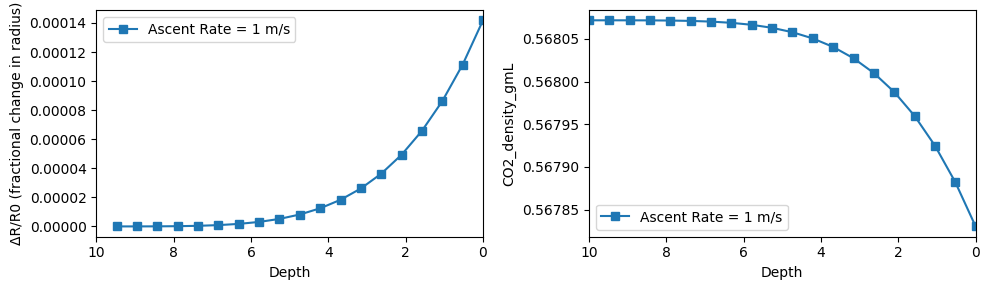

In [5]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

fig, (ax0,ax1) = plt.subplots(1,2, figsize=(10,3))
ax0.plot(results['Depth(km)'],results['\u0394R/R0 (fractional change in radius)'],marker='s',label=f"Ascent Rate = {ascent_rate_ms} m/s")
ax0.set_xlim([depth_path_ini_fin_step[0],depth_path_ini_fin_step[1]])
ax0.set_xlabel("Depth")
ax0.set_ylabel('\u0394R/R0 (fractional change in radius)')

ax1.plot(results['Depth(km)'],results['CO2_dens_gcm3'],marker='s',label=f"Ascent Rate = {ascent_rate_ms} m/s")
ax1.set_xlim([depth_path_ini_fin_step[0],depth_path_ini_fin_step[1]])
ax1.set_xlabel("Depth")
ax1.set_ylabel("CO2_density_gmL")
ax0.legend(loc='best')
ax1.legend(loc='best')
fig.tight_layout()
plt.show()
fig.savefig("fig4diadfit_paper_relaxifi.pdf",format='pdf')